In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

u'/Users/kristikorsberg/devel/ML/ML_Nepal'

In [3]:
ls Data/

caste.csv                 mentalhealth.csv          vaccinations.csv
communicabledisease1.csv  poverty1.csv              watersanitaion.csv
communicabledisease2.csv  poverty2.csv
hdi2011.csv               sexratio.csv


In [4]:
caste = pd.read_csv('Data/caste.csv')
caste.head()

,District,Zone,Ecological Belt,Development Region,Year (BS),Year (AD),Caste/Ethnicity,Gender,In number
0,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Chhetree,Male,66837
1,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Chhetree,Female,76097
2,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Brahman - Hill,Male,12289
3,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Brahman - Hill,Female,13983
4,Achham,Seti,Hill,Far-Western,2068/69,2011/12,Kami,Male,11340


In [5]:
caste_two = pd.DataFrame()
caste_two['district'] = caste['District']
caste_two['unique'] = caste['Caste/Ethnicity']+'_'+caste['Gender']
caste_two['number'] = caste['In number']

In [6]:
caste_two = caste_two.pivot(index='district', columns='unique', values='number')
caste_two = caste_two.fillna(0)
caste_two = caste_two.reset_index()
caste_two['total_people'] = caste_two.sum(axis=1)

In [7]:
caste_two.head()

unique,district,Aathpariya_Female,Aathpariya_Male,Amat_Female,Amat_Male,Badhaee_Female,Badhaee_Male,Badi_Female,Badi_Male,Bahing_Female,...,Undefined Others_Male,Walung_Female,Walung_Male,Yadav_Female,Yadav_Male,Yakkha_Female,Yakkha_Male,Yamphu_Female,Yamphu_Male,total_people
0,Achham,0.0,0.0,0.0,0.0,0.0,0.0,409.0,374.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257477.0
1,Arghakhanchi,0.0,0.0,0.0,0.0,0.0,0.0,150.0,130.0,0.0,...,0.0,0.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,197632.0
2,Baglung,0.0,0.0,0.0,0.0,0.0,0.0,42.0,35.0,0.0,...,26.0,0.0,0.0,8.0,23.0,0.0,0.0,0.0,0.0,268613.0
3,Baitadi,0.0,0.0,0.0,0.0,0.0,0.0,117.0,115.0,0.0,...,28.0,0.0,0.0,8.0,4.0,56.0,37.0,0.0,0.0,250898.0
4,Bajhang,0.0,0.0,0.0,0.0,0.0,0.0,253.0,191.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195159.0


In [8]:
hdi = pd.read_csv('Data/hdi2011.csv')
hdi.head()

,District,Zone,Geographical Region,Development Region,HDI
0,Achham,Seti,Hill,Far-Western,0.378
1,Arghakhanchi,Lumbini,Hill,Western,0.482
2,Banke,Bheri,Terai,Mid-Western,0.475
3,Baglung,Dhawalagiri,Hill,Western,0.478
4,Baitadi,Mahakali,Hill,Far-Western,0.416


In [9]:
hdi.columns

Index([u'District ', u'Zone', u'Geographical Region', u'Development Region',
       u'HDI '],
      dtype='object')

In [10]:
hdi_caste = pd.merge(hdi, caste_two, left_on='District ', right_on='district')

In [11]:
hdi_caste = hdi_caste.drop('district',axis=1)

In [12]:
hdi_caste.head()

,District,Zone,Geographical Region,Development Region,HDI,Aathpariya_Female,Aathpariya_Male,Amat_Female,Amat_Male,Badhaee_Female,...,Undefined Others_Male,Walung_Female,Walung_Male,Yadav_Female,Yadav_Male,Yakkha_Female,Yakkha_Male,Yamphu_Female,Yamphu_Male,total_people
0,Achham,Seti,Hill,Far-Western,0.378,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257477.0
1,Arghakhanchi,Lumbini,Hill,Western,0.482,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,197632.0
2,Banke,Bheri,Terai,Mid-Western,0.475,0.0,0.0,0.0,0.0,982.0,...,28.0,0.0,0.0,10880.0,12258.0,0.0,0.0,0.0,0.0,491313.0
3,Baglung,Dhawalagiri,Hill,Western,0.478,0.0,0.0,0.0,0.0,0.0,...,26.0,0.0,0.0,8.0,23.0,0.0,0.0,0.0,0.0,268613.0
4,Baitadi,Mahakali,Hill,Far-Western,0.416,0.0,0.0,0.0,0.0,0.0,...,28.0,0.0,0.0,8.0,4.0,56.0,37.0,0.0,0.0,250898.0


In [13]:
hdi_caste['Geographical Region'].unique()

array(['Hill', 'Terai', 'Mountain'], dtype=object)

#### Can we update the download data script with the below shapefile?

In [14]:
#url = 'http://www.arcgis.com/home/item.html?id=d4ad6faa446b42bd9f1d42407db7b5ba'
nepal = gpd.read_file('../../../Downloads/NP_75DWGS84/NP_75DWGS84.shp')

In [15]:
nepal['area'] = nepal.area

In [16]:
nepal = nepal[['DISTRICT', 'geometry','area']]

In [17]:
nepal.head(2)

,DISTRICT,geometry,area
0,Taplejung,"POLYGON ((87.83400591558305 27.95177382643147,...",0.331928
1,Panchthar,"POLYGON ((88.07355798392611 27.43371902876805,...",0.113566


In [18]:
nepal.crs

{'init': u'epsg:4326'}

In [19]:
geo_df = pd.merge(hdi_caste, nepal, left_on='District ', right_on='DISTRICT')

In [20]:
geo_df = gpd.GeoDataFrame(geo_df, geometry=geo_df['geometry'])
geo_df.crs = {'init' :'epsg:4326'}
geo_df.head(2)

,District,Zone,Geographical Region,Development Region,HDI,Aathpariya_Female,Aathpariya_Male,Amat_Female,Amat_Male,Badhaee_Female,...,Yadav_Female,Yadav_Male,Yakkha_Female,Yakkha_Male,Yamphu_Female,Yamphu_Male,total_people,DISTRICT,geometry,area
0,Achham,Seti,Hill,Far-Western,0.378,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,257477.0,Achham,"POLYGON ((81.17229242753619 29.38594791966788,...",0.157596
1,Arghakhanchi,Lumbini,Hill,Western,0.482,0.0,0.0,0.0,0.0,0.0,...,10.0,5.0,0.0,0.0,0.0,0.0,197632.0,Arghakhanchi,"POLYGON ((83.00438676076416 28.11207481910646,...",0.113578


In [21]:
geo_df['pop_dens'] = geo_df['total_people']/geo_df['area']

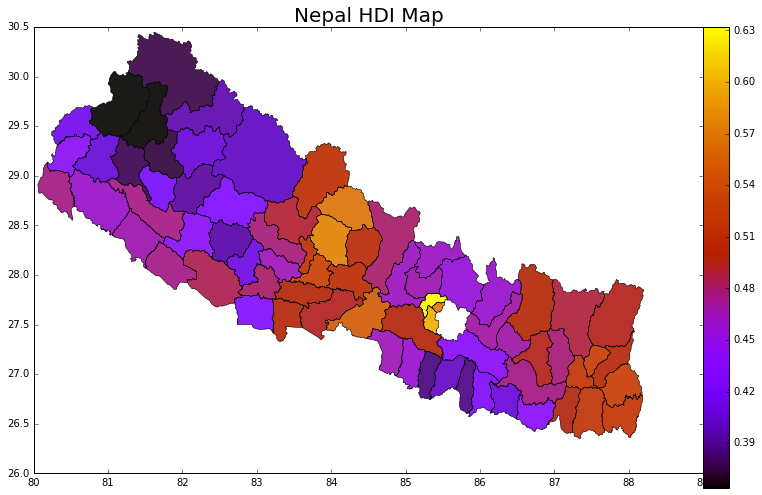

In [22]:
f, (ax1) = plt.subplots(figsize=(12,8))
geo_df.plot(column='HDI ',cmap='gnuplot',alpha=.9,linewidth=0.4,ax=ax1)
ax1.set_title("Nepal HDI Map", fontsize=20)
geo_df.plot(alpha=0.01, linewidth=0.25, ax=ax1)

vmin, vmax = min(geo_df['HDI '].values), \
            max(geo_df['HDI '].values)

fig = ax1.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)

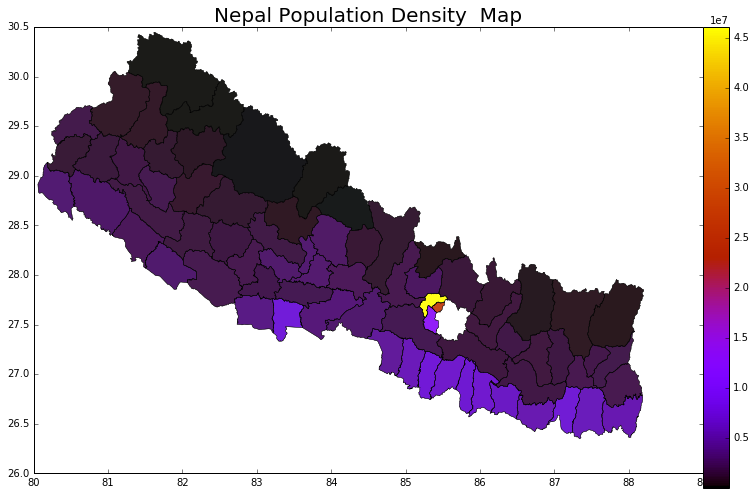

In [23]:
f, (ax1) = plt.subplots(figsize=(12,8))
geo_df.plot(column='pop_dens',cmap='gnuplot',alpha=.9,linewidth=0.4,ax=ax1)
ax1.set_title("Nepal Population Density  Map", fontsize=20)
geo_df.plot(alpha=0.01, linewidth=0.25, ax=ax1)

vmin, vmax = min(geo_df['pop_dens'].values), \
            max(geo_df['pop_dens'].values)

fig = ax1.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)